In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Обработка данных

## Подключение библиотек и считывание данных

In [166]:
# считываем данные
data = pd.read_csv('../data/car_price.csv', index_col=0)

data.head()

,Год выпуска,Поколение,Пробег,История пробега,ПТС,Владельцев по ПТС,Состояние,Модификация,Объём двигателя,Тип двигателя,Коробка передач,Привод,Комплектация,Тип кузова,Цвет,Руль,VIN или номер кузова,Название,Цена,Обмен
0,2010,I рестайлинг (2009—2012),156 000 км,7 записей в отчёте Автотеки,Оригинал,2,Не битый,2.3 4WD AT (238 л.с.),2.3 л,Бензин,Автомат,Полный,Sport,Внедорожник 5-дверный,Белый,Левый,JMZE*************,Mazda CX-7,1050000,NaN
1,2020,G07 (2018—2022),109 000 км,Проверить в Автотеке,Оригинал,1,Не битый,M50d 3.0 xDrive Steptronic (400 л.с.),3 л,Дизель,Автомат,Полный,Special by Individual,Внедорожник 5-дверный,Синий,Левый,WBAC*************,BMW X7,8800000,Не интересует
2,2023,I (2023—2024),15 км,NaN,NaN,1,Не битый,2.0 T-GDI 4WD DCT (249 л.с.),2 л,Бензин,Робот,Полный,Platinum,Внедорожник 5-дверный,Чёрный,Левый,LVTD*************,EXEED RX,3730000,NaN
3,2024,I (2022—2024),300 км,2 записи в отчёте Автотеки,NaN,1,Не битый,1.5hyb 4WD AT (530 л.с.),1.5 л,Гибрид,Автомат,Полный,Executive,Седан,Чёрный,Левый,LDP9*************,Voyah Passion (Chasing Light),6770000,NaN
4,2024,I (2021—2024),10 км,NaN,Электронный,1,Не битый,2.0 4WD AT (238 л.с.),2 л,Бензин,Автомат,Полный,Flagship,Внедорожник 5-дверный,Белый,Левый,LB37*************,Geely Monjaro,3600000,Не интересует


## Обработка пропущенных значений

### Обзор данных

In [167]:
# удалим дубликаты, пересоберем индексы, посмотрим размерность
data.drop_duplicates(keep='first', inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape

(2109, 20)

In [168]:
# посмотрим на краткое содержание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Год выпуска           2109 non-null   int64 
 1   Поколение             2109 non-null   object
 2   Пробег                2109 non-null   object
 3   История пробега       2008 non-null   object
 4   ПТС                   1373 non-null   object
 5   Владельцев по ПТС     2109 non-null   object
 6   Состояние             2109 non-null   object
 7   Модификация           2108 non-null   object
 8   Объём двигателя       2107 non-null   object
 9   Тип двигателя         2109 non-null   object
 10  Коробка передач       2109 non-null   object
 11  Привод                2109 non-null   object
 12  Комплектация          1715 non-null   object
 13  Тип кузова            2109 non-null   object
 14  Цвет                  2109 non-null   object
 15  Руль                  2109 non-null   

Видно, что у признаков **История пробега**, **ПТС**, **Модификация**, **Объем двигателя**, **Комплектация** и **Обмен** есть пропущенные значения.

### Признак - **История пробега**

**История пробега** показывает количество информации об автомобиле на конкретном агрегаторе - Авито. Его можно удалить

In [169]:
data.drop(columns="История пробега", inplace=True)

### Признак - **ПТС**

In [170]:
# посмотрим, какие значения может принимать столбец ПТС
data['ПТС'].value_counts()

ПТС
Оригинал       1002
Электронный     213
Дубликат        158
Name: count, dtype: int64

Можно было бы сделать данный признак бинарным - ПТС указан/не указан, однако формат ПТС также может влиять на автомобиля. Считается, что с дубликат ПТС является менее предпочтительным вариантом, так как может, например, указывать на частую смену владельцев. Более подробно про виды ПТС:
- https://rolf-probeg.ru/blog/dublikat-pts-chem-opasen-i-kak-otlichit-ot-originala/?utm_source=google.com&utm_medium=organic&utm_campaign=google.com&utm_referrer=google.com
- https://ufa.tts.ru/blog/sovety-avtomobilistam/vse-ob-elektronnom-pts-v-chem-otlichiya-ot-bumazhnogo-formata-kak-poluchit-epts-i-postavit-mashinu-n/

Данный признак является категориальным. Заполним пропущенные ячейки значением "Не указан"

In [171]:
data['ПТС'].fillna('Не указан', inplace=True)

### Признак - **Модификация**

In [172]:
# посмотрим на некоторые значения 
data['Модификация'].head()

0                    2.3 4WD AT (238 л.с.)
1    M50d 3.0 xDrive Steptronic (400 л.с.)
2             2.0 T-GDI 4WD DCT (249 л.с.)
3                 1.5hyb 4WD AT (530 л.с.)
4                    2.0 4WD AT (238 л.с.)
Name: Модификация, dtype: object

In [173]:
# посмотрим на строки с пропущенными значениями
data[data['Модификация'].isna()]

,Год выпуска,Поколение,Пробег,ПТС,Владельцев по ПТС,Состояние,Модификация,Объём двигателя,Тип двигателя,Коробка передач,Привод,Комплектация,Тип кузова,Цвет,Руль,VIN или номер кузова,Название,Цена,Обмен
1621,2014,I (2010—2014),109 000 км,Не указан,2,Не битый,NaN,1.6 л,Бензин,Вариатор,Полный,NaN,Внедорожник 5-дверный,Белый,Левый,SJNF*************,Nissan Juke,1419000,Возможен


Модификацию можно определить по другим признакам. Найдем машину с такими же характеристиками

In [174]:
data[(data['Название'] == 'Nissan Juke') & (data['Привод'] == 'Полный')]

,Год выпуска,Поколение,Пробег,ПТС,Владельцев по ПТС,Состояние,Модификация,Объём двигателя,Тип двигателя,Коробка передач,Привод,Комплектация,Тип кузова,Цвет,Руль,VIN или номер кузова,Название,Цена,Обмен
1621,2014,I (2010—2014),109 000 км,Не указан,2,Не битый,NaN,1.6 л,Бензин,Вариатор,Полный,NaN,Внедорожник 5-дверный,Белый,Левый,SJNF*************,Nissan Juke,1419000,Возможен
1667,2011,I (2010—2014),103 000 км,Оригинал,2,Не битый,1.6 CVT (190 л.с.) 4WD,1.6 л,Бензин,Вариатор,Полный,Базовая,Внедорожник 5-дверный,Чёрный,Левый,JN8A*************,Nissan Juke,1170000,Возможен


In [175]:
# запишем вместо пустого значения модификацию - "1.6 CVT (190 л.с.) 4WD"
data.loc[1621, 'Модификация'] = "1.6 CVT (190 л.с.) 4WD"

Модификация включает себя следующий параметры автомобиля: характеристики двигателя (объем, мощность, тип топлива, индекс/наименование), тип привода, тип КПП. Получается, данный признак дублирует информацию 4-х других признаков - **Объём двигателя**, **Тип двигателя**, **Коробка передач**, **Привод**. Тогда заменим признак **Модификация** на **Мощность**, вытащив нужную информацию

In [176]:
data['Мощность'] = data['Модификация'].apply(lambda x: str(x).split('(')[-1].split()[0])
data.head()

,Год выпуска,Поколение,Пробег,ПТС,Владельцев по ПТС,Состояние,Модификация,Объём двигателя,Тип двигателя,Коробка передач,Привод,Комплектация,Тип кузова,Цвет,Руль,VIN или номер кузова,Название,Цена,Обмен,Мощность
0,2010,I рестайлинг (2009—2012),156 000 км,Оригинал,2,Не битый,2.3 4WD AT (238 л.с.),2.3 л,Бензин,Автомат,Полный,Sport,Внедорожник 5-дверный,Белый,Левый,JMZE*************,Mazda CX-7,1050000,NaN,238
1,2020,G07 (2018—2022),109 000 км,Оригинал,1,Не битый,M50d 3.0 xDrive Steptronic (400 л.с.),3 л,Дизель,Автомат,Полный,Special by Individual,Внедорожник 5-дверный,Синий,Левый,WBAC*************,BMW X7,8800000,Не интересует,400
2,2023,I (2023—2024),15 км,Не указан,1,Не битый,2.0 T-GDI 4WD DCT (249 л.с.),2 л,Бензин,Робот,Полный,Platinum,Внедорожник 5-дверный,Чёрный,Левый,LVTD*************,EXEED RX,3730000,NaN,249
3,2024,I (2022—2024),300 км,Не указан,1,Не битый,1.5hyb 4WD AT (530 л.с.),1.5 л,Гибрид,Автомат,Полный,Executive,Седан,Чёрный,Левый,LDP9*************,Voyah Passion (Chasing Light),6770000,NaN,530
4,2024,I (2021—2024),10 км,Электронный,1,Не битый,2.0 4WD AT (238 л.с.),2 л,Бензин,Автомат,Полный,Flagship,Внедорожник 5-дверный,Белый,Левый,LB37*************,Geely Monjaro,3600000,Не интересует,238


In [177]:
# удалим теперь не нужный столбец "Модификация"
data.drop(columns='Модификация', inplace=True)

### Признак - **Объем двигателя**

Посмотрим, у каких строк отсутствуют значения данной колонки

In [178]:
data[data['Объём двигателя'].isna()] 

,Год выпуска,Поколение,Пробег,ПТС,Владельцев по ПТС,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Комплектация,Тип кузова,Цвет,Руль,VIN или номер кузова,Название,Цена,Обмен,Мощность
1736,2022,II (2017—2024),15 220 км,Электронный,1,Не битый,NaN,Электро,Автомат,Передний,Базовая,Хетчбек 5-дверный,Белый,Левый,1N4C*************,Nissan Leaf,2930000,Возможен,218
1810,2015,II рестайлинг (2015—2017),124 636 км,Не указан,3,Не битый,NaN,Бензин,Автомат,Передний,Luxe,Хетчбек 5-дверный,Розовый,Левый,KNAB*************,Kia Picanto,1020000,NaN,85


Сначала заполним строку с Kia Picanto, найдя машину с такими же остальными характеристиками

In [179]:
data[(data['Название'] == 'Kia Picanto') & (data['Мощность'] == 85)]

,Год выпуска,Поколение,Пробег,ПТС,Владельцев по ПТС,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Комплектация,Тип кузова,Цвет,Руль,VIN или номер кузова,Название,Цена,Обмен,Мощность


В датасете не нашлось таких же авто. Найдем объем двигателя, обратясь к каталогу *Авито*:
- https://www.avito.ru/catalog/auto/kia/picanto/ii_restayling/hetchbek/specs-ASgBAgICBUTgtg3KmCjitg3yrCjmtg3Qtyjqtg3~_CjQvA78m9EB?uid=7OV8QUr

Объем двигателя - 1.3 л

In [180]:
# запишем в датафрейм
data.loc[1810, 'Объём двигателя'] = "1.3 л"

Заметим, что у автомобилей с электрическим типом двигателя не может быть такой характеристики, как **Объем двигателя**. Запишем в эту колонку `0` у электромобилей. Тогда модель просто не будет учитывать этот признак у авто с электродвигателем, что логично

In [181]:
# обновим значения
data.update(data[data['Тип двигателя'] == 'Электро']['Объём двигателя'].fillna('0 л'))

In [182]:
# посмотрим, что исправилось корректно
data[data['Тип двигателя'] == 'Электро'] 

,Год выпуска,Поколение,Пробег,ПТС,Владельцев по ПТС,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Комплектация,Тип кузова,Цвет,Руль,VIN или номер кузова,Название,Цена,Обмен,Мощность
1736,2022,II (2017—2024),15 220 км,Электронный,1,Не битый,0 л,Электро,Автомат,Передний,Базовая,Хетчбек 5-дверный,Белый,Левый,1N4C*************,Nissan Leaf,2930000,Возможен,218


Сделаем этот признак вещественным, убрав букву "л"

In [183]:
data['Объём двигателя'] = data['Объём двигателя'].apply(lambda x: x.split()[0])

In [184]:
data.head()

,Год выпуска,Поколение,Пробег,ПТС,Владельцев по ПТС,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Комплектация,Тип кузова,Цвет,Руль,VIN или номер кузова,Название,Цена,Обмен,Мощность
0,2010,I рестайлинг (2009—2012),156 000 км,Оригинал,2,Не битый,2.3,Бензин,Автомат,Полный,Sport,Внедорожник 5-дверный,Белый,Левый,JMZE*************,Mazda CX-7,1050000,NaN,238
1,2020,G07 (2018—2022),109 000 км,Оригинал,1,Не битый,3,Дизель,Автомат,Полный,Special by Individual,Внедорожник 5-дверный,Синий,Левый,WBAC*************,BMW X7,8800000,Не интересует,400
2,2023,I (2023—2024),15 км,Не указан,1,Не битый,2,Бензин,Робот,Полный,Platinum,Внедорожник 5-дверный,Чёрный,Левый,LVTD*************,EXEED RX,3730000,NaN,249
3,2024,I (2022—2024),300 км,Не указан,1,Не битый,1.5,Гибрид,Автомат,Полный,Executive,Седан,Чёрный,Левый,LDP9*************,Voyah Passion (Chasing Light),6770000,NaN,530
4,2024,I (2021—2024),10 км,Электронный,1,Не битый,2,Бензин,Автомат,Полный,Flagship,Внедорожник 5-дверный,Белый,Левый,LB37*************,Geely Monjaro,3600000,Не интересует,238


### Признак - **Комплектация**

Каждая модель авто имеет свои названия комплектаций или не имеет их вообще, поэтому данный признак имеет очень большое количество различных невещественных значений. Удалим его

In [185]:
# посмотим, какие значения принимает данный признак
data['Комплектация'].value_counts()

Комплектация
Базовая                282
Comfort                156
Luxe                    97
Люкс                    45
Prestige                42
                      ... 
Black Vision             1
Prestige Black           1
Classic Кондиционер      1
Classique                1
Lifestyle Plus           1
Name: count, Length: 328, dtype: int64

In [186]:
data.drop(columns='Комплектация', inplace=True)

### Признак - **Обмен**

In [187]:
# посмотрим на распределение значений в данной колонке
data['Обмен'].value_counts()

Обмен
Не интересует    929
Возможен         625
Name: count, dtype: int64

Большая часть не рассматривает обмен. Это специфичный запрос, поэтому можно предположить, что если продавца интересует обмен, то он это скорее всего укажет. В противном случае, продавец может просто не обратить внимания на этот параметр и ничего не напишет. Заменим пустые значения на "Не интересует"

In [188]:
data['Обмен'].fillna('Не интересует', inplace=True)

## Приведение типов и удаление лишних столбцов

### Признаки - **Год выпуска** и **Поколение**

Кажется, что эти колонки дублируют друг друга. Преобразуем их в следующие:
- **Год выпуска** -> **Лет в эксплуатации** (2025 - **Год выпуска**). Этот признак будет характеризовать, как давно машина куплена и находится в эксплуатации.
- **Поколение** -> **Год выпуска** (первое значение в скобках). Теперь этот признак будет означать год начала производства модели, т.е. насколько она свежая и современная.

In [189]:
# Создадим новый признак "Лет в эксплуатации"
data['Лет в эксплуатации'] = 2025 - data['Год выпуска']

In [190]:
# Преобразуем признак "Год выпуска"
data['Год выпуска'] = data['Поколение'].apply(lambda x: x.split('(')[-1][:4])

In [191]:
data.head()

,Год выпуска,Поколение,Пробег,ПТС,Владельцев по ПТС,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Тип кузова,Цвет,Руль,VIN или номер кузова,Название,Цена,Обмен,Мощность,Лет в эксплуатации
0,2009,I рестайлинг (2009—2012),156 000 км,Оригинал,2,Не битый,2.3,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,JMZE*************,Mazda CX-7,1050000,Не интересует,238,15
1,2018,G07 (2018—2022),109 000 км,Оригинал,1,Не битый,3,Дизель,Автомат,Полный,Внедорожник 5-дверный,Синий,Левый,WBAC*************,BMW X7,8800000,Не интересует,400,5
2,2023,I (2023—2024),15 км,Не указан,1,Не битый,2,Бензин,Робот,Полный,Внедорожник 5-дверный,Чёрный,Левый,LVTD*************,EXEED RX,3730000,Не интересует,249,2
3,2022,I (2022—2024),300 км,Не указан,1,Не битый,1.5,Гибрид,Автомат,Полный,Седан,Чёрный,Левый,LDP9*************,Voyah Passion (Chasing Light),6770000,Не интересует,530,1
4,2021,I (2021—2024),10 км,Электронный,1,Не битый,2,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,LB37*************,Geely Monjaro,3600000,Не интересует,238,1


### Признак - **Пробег**

Уберем "км" и сделаем его вещественным

In [192]:
# используем re, чтобы удалить неразрывные пробелы
import re
data['Пробег'] = data['Пробег'].apply(lambda x: re.sub(r'\s+', '', x).replace("км", ""))

In [193]:
data.head()

,Год выпуска,Поколение,Пробег,ПТС,Владельцев по ПТС,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Тип кузова,Цвет,Руль,VIN или номер кузова,Название,Цена,Обмен,Мощность,Лет в эксплуатации
0,2009,I рестайлинг (2009—2012),156000,Оригинал,2,Не битый,2.3,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,JMZE*************,Mazda CX-7,1050000,Не интересует,238,15
1,2018,G07 (2018—2022),109000,Оригинал,1,Не битый,3,Дизель,Автомат,Полный,Внедорожник 5-дверный,Синий,Левый,WBAC*************,BMW X7,8800000,Не интересует,400,5
2,2023,I (2023—2024),15,Не указан,1,Не битый,2,Бензин,Робот,Полный,Внедорожник 5-дверный,Чёрный,Левый,LVTD*************,EXEED RX,3730000,Не интересует,249,2
3,2022,I (2022—2024),300,Не указан,1,Не битый,1.5,Гибрид,Автомат,Полный,Седан,Чёрный,Левый,LDP9*************,Voyah Passion (Chasing Light),6770000,Не интересует,530,1
4,2021,I (2021—2024),10,Электронный,1,Не битый,2,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,LB37*************,Geely Monjaro,3600000,Не интересует,238,1


### Признак - **Владельцев по ПТС**

In [194]:
# посмотрим, какие значения может принимать
data['Владельцев по ПТС'].value_counts()

Владельцев по ПТС
1     762
2     541
4+    404
3     402
Name: count, dtype: int64

Данный признак лучше сделать категориальным. Декодируем после обработки вещественных признаков

### Удаление лишних признаков

Удалим следующие признаки:
- **Поколение**, мы его заменили на **Год выпуска**.
- **VIN или номер кузова** нужен для идентификации автомобиля. Данный признак мог бы использоваться, как id, но из-за того, что доступны только первые 4 символа, в нашем датафрейме значения VIN повторяются.

In [195]:
data.drop(columns=["Поколение", "VIN или номер кузова"], inplace=True)

In [196]:
data.head()

,Год выпуска,Пробег,ПТС,Владельцев по ПТС,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Тип кузова,Цвет,Руль,Название,Цена,Обмен,Мощность,Лет в эксплуатации
0,2009,156000,Оригинал,2,Не битый,2.3,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,Mazda CX-7,1050000,Не интересует,238,15
1,2018,109000,Оригинал,1,Не битый,3,Дизель,Автомат,Полный,Внедорожник 5-дверный,Синий,Левый,BMW X7,8800000,Не интересует,400,5
2,2023,15,Не указан,1,Не битый,2,Бензин,Робот,Полный,Внедорожник 5-дверный,Чёрный,Левый,EXEED RX,3730000,Не интересует,249,2
3,2022,300,Не указан,1,Не битый,1.5,Гибрид,Автомат,Полный,Седан,Чёрный,Левый,Voyah Passion (Chasing Light),6770000,Не интересует,530,1
4,2021,10,Электронный,1,Не битый,2,Бензин,Автомат,Полный,Внедорожник 5-дверный,Белый,Левый,Geely Monjaro,3600000,Не интересует,238,1


### Приведение к числовому типу

In [197]:
# посмотрим, какие колонки нужно преобразовать
data.dtypes

Год выпуска           object
Пробег                object
ПТС                   object
Владельцев по ПТС     object
Состояние             object
Объём двигателя       object
Тип двигателя         object
Коробка передач       object
Привод                object
Тип кузова            object
Цвет                  object
Руль                  object
Название              object
Цена                   int64
Обмен                 object
Мощность              object
Лет в эксплуатации     int64
dtype: object

Приведем колонки **Год выпуска**, **Пробег**, **Объём двигателя**, **Мощность** к числовому типу

In [198]:
cols_to_num = ['Год выпуска', 'Пробег', 'Объём двигателя', 'Мощность']
data[cols_to_num] = data[cols_to_num].map(pd.to_numeric)

Возьмем числовые признаки и посмотрим на их описание, корелляции

In [199]:
# берем столбцы, содержащие числовой тип
numeric_columns = data.loc[:,data.dtypes!=object].columns

In [200]:
data[numeric_columns].describe()

,Год выпуска,Пробег,Объём двигателя,Цена,Мощность,Лет в эксплуатации
count,2109.000000,2109.000000,2109.000000,2.109000e+03,2109.000000,2109.000000
mean,2010.867236,134501.739213,1.847843,1.275330e+06,130.732101,11.057373
std,6.954952,82870.145173,0.582445,1.544960e+06,58.560554,5.474023
min,1977.000000,1.000000,0.000000,3.500000e+04,33.000000,1.000000
25%,2007.000000,80000.000000,1.600000,5.100000e+05,98.000000,7.000000
50%,2011.000000,130000.000000,1.600000,8.950000e+05,114.000000,11.000000
75%,2016.000000,179900.000000,2.000000,1.530000e+06,150.000000,14.000000
max,2024.000000,1000000.000000,6.200000,2.500000e+07,717.000000,39.000000


Все значения адекватные, кроме максимального пробега. Похоже на выброс, посмотрим на строки, у которых пробег больше 500 тыс.

In [201]:
data[data['Пробег'] > 500000]

,Год выпуска,Пробег,ПТС,Владельцев по ПТС,Состояние,Объём двигателя,Тип двигателя,Коробка передач,Привод,Тип кузова,Цвет,Руль,Название,Цена,Обмен,Мощность,Лет в эксплуатации
104,2003,577351,Не указан,4+,Не битый,2.5,Дизель,Механика,Передний,Минивэн,Серебряный,Левый,Volkswagen Multivan,1270000,Возможен,131,22
509,2001,557469,Оригинал,4+,Не битый,1.8,Бензин,Механика,Передний,Седан,Чёрный,Левый,Ford Focus,245000,Не интересует,115,21
970,2001,999999,Оригинал,4+,Не битый,1.6,Бензин,Механика,Передний,Хетчбек 5-дверный,Серебряный,Левый,ВАЗ (LADA) 2114 Samara,111111,Не интересует,81,18
971,1998,1000000,Оригинал,3,Не битый,1.5,Бензин,Механика,Задний,Фургон,Бежевый,Левый,ВИС 2345,590000,Не интересует,71,25
1417,1998,651773,Не указан,4+,Не битый,4.7,Бензин,Автомат,Полный,Внедорожник 5-дверный,Чёрный,Левый,Toyota Land Cruiser,970000,Возможен,235,23
1955,2007,668847,Оригинал,1,Не битый,4.5,Дизель,Автомат,Полный,Внедорожник 5-дверный,Серый,Левый,Toyota Land Cruiser,2499000,Возможен,235,15


In [202]:
# удалим выбросы
data.drop(index=[970, 971], inplace=True)

In [203]:
# посмотрим корелляции
data[numeric_columns].corr()

,Год выпуска,Пробег,Объём двигателя,Цена,Мощность,Лет в эксплуатации
Год выпуска,1.000000,-0.510649,0.015218,0.401623,0.229703,-0.853092
Пробег,-0.510649,1.000000,0.159140,-0.323719,-0.013495,0.665638
Объём двигателя,0.015218,0.159140,1.000000,0.474830,0.772654,0.057146
Цена,0.401623,-0.323719,0.474830,1.000000,0.670635,-0.400894
Мощность,0.229703,-0.013495,0.772654,0.670635,1.000000,-0.138380
Лет в эксплуатации,-0.853092,0.665638,0.057146,-0.400894,-0.138380,1.000000


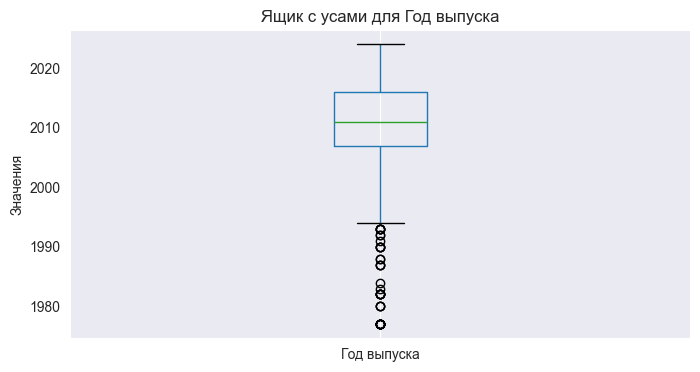

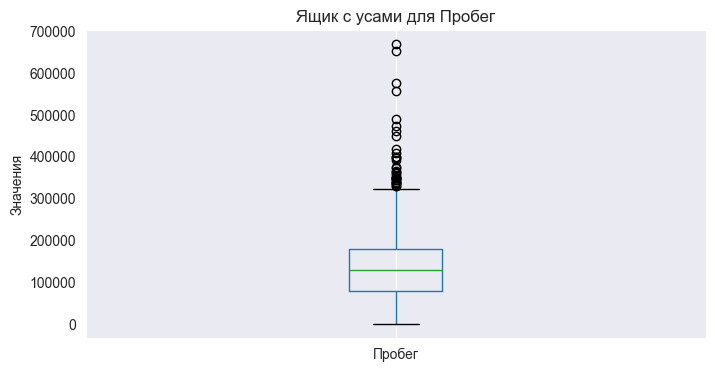

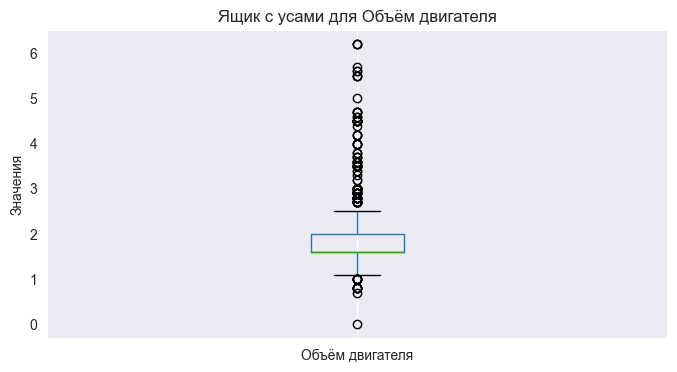

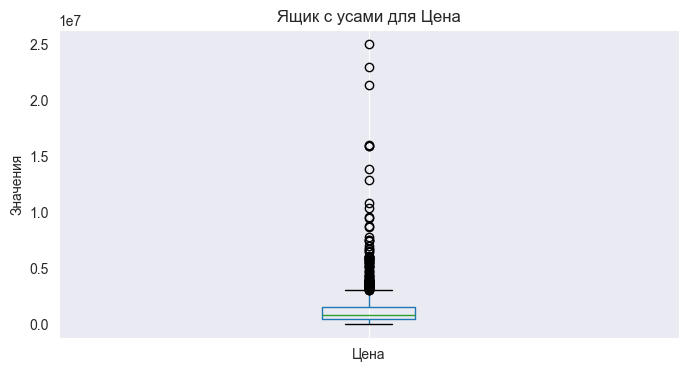

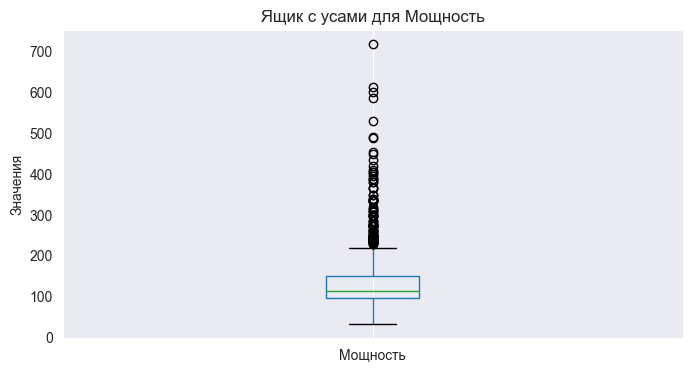

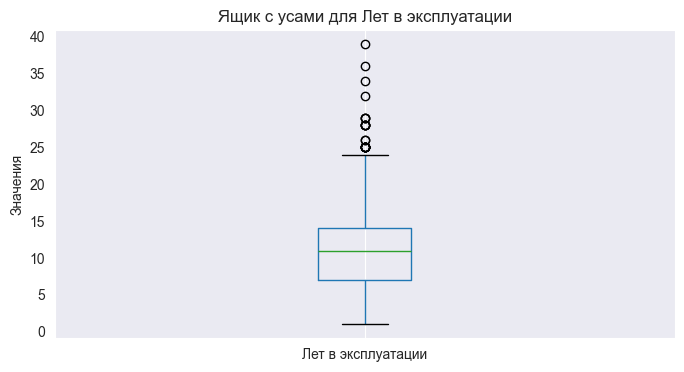

In [204]:
df = pd.DataFrame(data)

# Отбираем только числовые столбцы
numeric_df = df.select_dtypes(include='number')

# Создаем ящик с усами для каждого числового признака
for column in numeric_df.columns:
    plt.figure(figsize=(8, 4))
    numeric_df.boxplot(column=column)
    plt.title(f'Ящик с усами для {column}')
    plt.ylabel('Значения')
    plt.grid(axis='y')
    plt.show()